<a href="https://colab.research.google.com/github/2j0123/WASSUP_Project_Team7_2/blob/US/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Woosung\\Desktop\\공부\\2024\\Estsoft\\프로젝트2\\files\\drugsComTrain_raw.tsv", sep = '\t')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
None


condition중에 결측치. 나머지는 없음.

In [ ]:
print(df.head())

   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           1

In [ ]:
df.dropna(axis=0, inplace=True) # 결측치가 있는 행 많지 않아서 제거
df.drop('date', axis=1, inplace=True) # 날짜는 딱히 필요 없으니까 제거
import html
df['review']=df['review'].apply(html.unescape)#html 문자 처리

In [ ]:
print(df['drugName'].nunique( )) #어떤 값들이 있는지
print(df['condition'].nunique( )) #어떤 값들이 있는지

3431
884


In [ ]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,160398.000000,160398.000000,160398.000000
mean,115957.147309,6.995923,28.097613
std,67015.899492,3.272303,36.457876
min,2.000000,1.000000,0.000000
25%,58065.250000,5.000000,6.000000
50%,115845.500000,8.000000,16.000000
75%,173826.750000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


usefulcount 낮은 것들 처리방법?


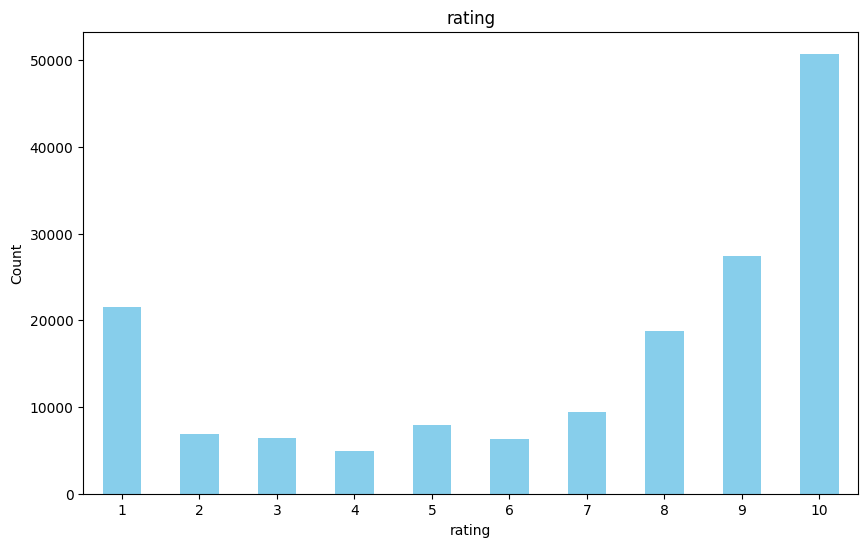

In [ ]:
from matplotlib import pyplot as plt
score_counts = df['rating'].value_counts().sort_index()
all_scores = pd.Series(index=range(1, 11), data=0).fillna(0)

# 실제 점수 빈도와 병합하여 모든 점수를 포함하도록 함
all_scores = all_scores.add(score_counts, fill_value=0)

# 막대 그래프로 나타내기
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
all_scores.plot(kind='bar', color='skyblue')
plt.title('rating')
plt.xlabel('rating')
plt.ylabel('Count')
plt.xticks(rotation=0) # x축 레이블 회전 설정
plt.show()

10점이 좀 많다..
너무 좋은 말만 써 있는 것들은 걷어내기?

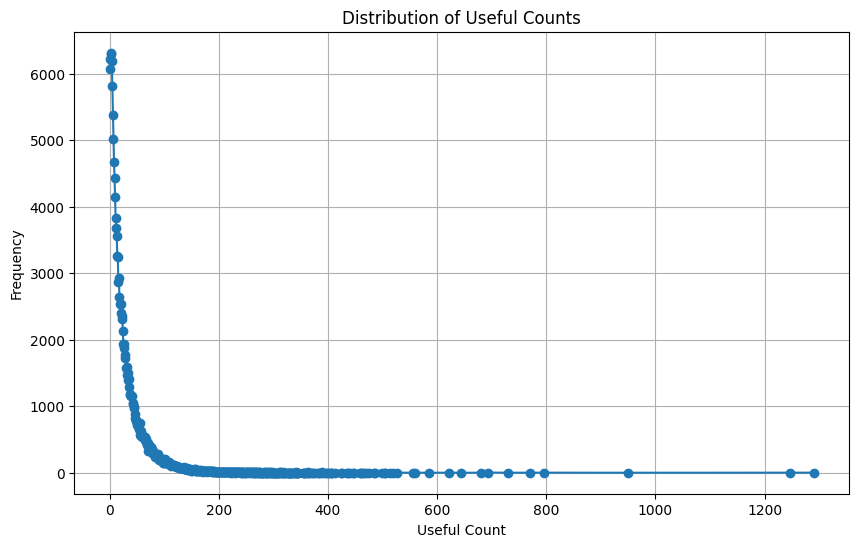

In [ ]:
useful_counts = df['usefulCount'].value_counts()

# 빈도수 데이터를 'usefulcount' 값에 따라 정렬
useful_counts= useful_counts.sort_index()

# 선형 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(useful_counts.index, useful_counts.values, marker='o', linestyle='-')
plt.title('Distribution of Useful Counts')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
print(useful_counts.head(20))

usefulCount
0     6217
1     6061
2     6313
3     6298
4     6189
5     5809
6     5379
7     5022
8     4675
9     4435
10    4138
11    3829
12    3678
13    3565
14    3259
15    3240
16    2874
17    2929
18    2636
19    2539
Name: count, dtype: int64


몇개를 제거해야 할지

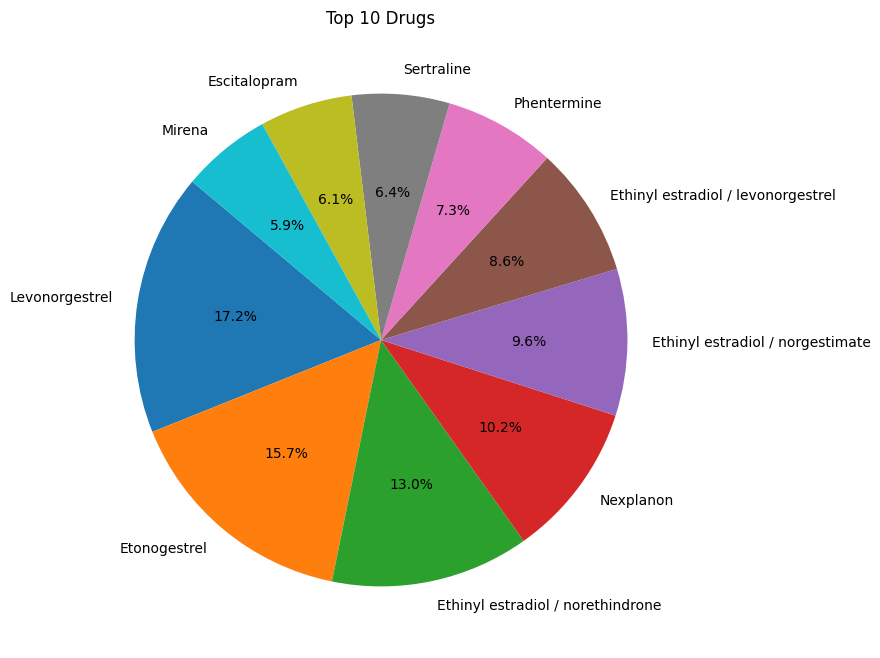

In [ ]:
# 'drugs' 열에서 각 약물의 등장 빈도 계산
drug_counts = df['drugName'].value_counts()

# 상위 10개 약물 선택
top_drugs = drug_counts.head(10)

# 원형 그래프로 나타내기
plt.figure(figsize=(8, 8)) # 그래프 크기 설정
top_drugs.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Drugs')
plt.ylabel('')
plt.show()

In [ ]:
# 각 리뷰의 길이를 계산합니다.
df['length'] = df['review'].apply(len)

print(f"가장 짧은 문장 길이: {df['length'].min()}")
print(f'위치는 {df['length'].idxmin()}')
print(f"가장 긴 문장 길이: {df['length'].max()}")
print(f'위치는 {df['length'].idxmax()}')
import numpy as np
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(df['length'])))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(df['length'])))
print('리뷰 길이 중간값: {}'.format(np.median(df['length'])))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(df['length'],25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(df['length'],75)))

가장 짧은 문장 길이: 3
위치는 42909
가장 긴 문장 길이: 10433
위치는 75663
리뷰 길이 평균값: 449.60
리뷰 길이 표준편차: 236.88
리뷰 길이 중간값: 446.0
리뷰 길이 제1사분위: 257.0
리뷰 길이 제3사분위: 678.0


In [ ]:
train_review = [review for review in df['review'] if type(review) is str]
train_review

['"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."',
 '"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormo

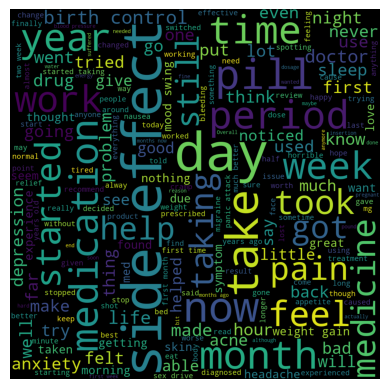

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=1000,height=1000).generate(' '.join(train_review))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
average_ratings = df.groupby('drugName')['rating'].mean().reset_index()

# 결과 출력
print(average_ratings)

                                  drugName     rating
0                A + D Cracked Skin Relief  10.000000
1                               A / B Otic  10.000000
2     Abacavir / dolutegravir / lamivudine   8.211538
3       Abacavir / lamivudine / zidovudine   9.000000
4                                Abatacept   7.157895
...                                    ...        ...
3426                                 Zyvox   9.000000
3427                               ZzzQuil   2.500000
3428                 depo-subQ provera 104   1.000000
3429                                  ella   6.980392
3430                                femhrt   4.000000

[3431 rows x 2 columns]


In [ ]:
dict = average_ratings.set_index('drugName')['rating'].to_dict()
df['average_rating_drug'] = df['drugName'].map(dict)

평점에서 너무 벗어나는 값들은 제외? / 가짜 리뷰들이 있다면 어떡할 것인가.

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,usefulCount,length,average_rating_drug
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27,79,5.882353
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192,741,5.944444
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17,745,7.600000
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10,443,7.470320
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37,699,8.636574


In [ ]:
X=df['condition']
y=df['drugName']
review=df['review']

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(review)
review_seq = tokenizer.texts_to_sequences(review)
print(len(tokenizer.word_index))
print(review.iloc[0])
print(review_seq[0])
print(review.iloc[1])
print(review_seq[1])




54134
"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"
[7, 36, 26, 33, 193, 1, 42, 7, 14, 841, 11, 2932, 102, 146, 2, 3848, 1554]
"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."
[5, 651, 18, 3404, 222, 507, 1653, 73, 11, 3286, 276, 401, 1222, 59, 162, 365, 13, 143, 73, 59, 16

In [ ]:
word_idx = tokenizer.word_index
word_count = tokenizer.word_counts
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print("인덱스:", word_idx)
print("사용수:", word_count)

인덱스: {'i': 1, 'and': 2, 'the': 3, 'to': 4, 'my': 5, 'a': 6, 'it': 7, 'for': 8, 'was': 9, 'have': 10, 'of': 11, 'on': 12, 'this': 13, 'in': 14, 'but': 15, 'me': 16, 'had': 17, 'is': 18, 'with': 19, 'that': 20, 'not': 21, 'so': 22, 'been': 23, 'at': 24, 'after': 25, 'no': 26, 'day': 27, 'as': 28, 'am': 29, 'about': 30, 'now': 31, "i'm": 32, 'side': 33, 'taking': 34, 'all': 35, 'has': 36, 'years': 37, "i've": 38, 'pain': 39, 'effects': 40, 'first': 41, 'take': 42, 'only': 43, 'months': 44, 'started': 45, 'like': 46, '2': 47, 'get': 48, 'up': 49, 'you': 50, 'be': 51, 'days': 52, 'just': 53, 'very': 54, 'time': 55, 'out': 56, 'or': 57, 'from': 58, 'when': 59, '3': 60, 'feel': 61, 'if': 62, 'would': 63, 'because': 64, 'back': 65, 'pill': 66, 'more': 67, 'one': 68, '\r': 69, 'weeks': 70, "it's": 71, 'are': 72, 'week': 73, 'also': 74, 'took': 75, 'period': 76, 'medication': 77, 'doctor': 78, 'weight': 79, 'before': 80, 'then': 81, 'got': 82, 'will': 83, 'did': 84, 'month': 85, 'do': 86, 'which

In [ ]:
token = 'hi'

# 해당 토큰을 포함하는 행들을 필터링하고, 이들 행의 'rating' 열에 대한 평균을 계산
average_rating = df[df['review'].str.contains(token)]['rating'].mean()

print(f"'{token}' 토큰이 있는 문장의 평균 평점 : {average_rating}")

'hi' 토큰이 있는 문장의 평균 평점 : 6.9233999339098755


대부분 7점 초반 6점 후반
side: 7.33? side effect: 7.41 negative: 7.5 anymore 6.96 immediately 6.3 shits: 7.45 nothing 7.08


fuck 2.71
fucking 2.33
shit 5.79
crazy 5.9
awful 5.5
suck 6.15
pain 6.75
bad 6.71
still 6.6
never 6.34
ruin/ruined 4.0

god 7.2
thankfully 7.4
nice 7.5
perfect 7.8
perfectly 7.65
great : 7.9
thanks : 8.1
best: 8.5
fantastic: 8.6
miracle: 9.12
saved: 9.4

In [ ]:
#index_word = {index: word for word, index in tokenizer.word_index.items()}

# 인코딩된 시퀀스를 단어로 디코딩
#decoded_reviews = [[index_word[i] for i in seq] for seq in review_seq]

#for original, decoded in zip(review, decoded_reviews):
    #print(f"Original: {original}")
    #print(f"Decoded: {' '.join(decoded)}\n")

In [ ]:
#회귀 - 다중공선성 평가
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 가정: df는 pandas DataFrame이며, 독립 변수들만 포함하고 있다.
# VIF 계산을 위해 상수항을 추가합니다. 이는 VIF 계산 시 필요합니다.
df_with_constant = add_constant(df)

# VIF 값을 저장할 빈 리스트를 생성합니다.
vif_data = []

# 각 변수에 대해 VIF 값을 계산하고, 결과를 vif_data 리스트에 추가합니다.
for i in range(len(df_with_constant.columns)):
    vif = variance_inflation_factor(df_with_constant.values, i)
    vif_data.append({
        'Variable': df_with_constant.columns[i],
        'VIF': vif
    })

# VIF 데이터를 DataFrame으로 변환하여 출력합니다.
vif_df = pd.DataFrame(vif_data)
print(vif_df)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''